In [22]:
import skimage
from skimage import data
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
bird = mpimg.imread("datasets/images/bird.jpeg")

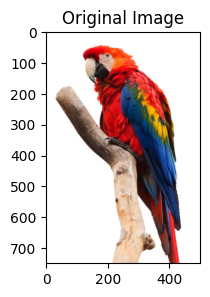

In [3]:
plt.figure(figsize=(3,3))
plt.title('Original Image')
plt.imshow(bird)

In [4]:
bird.shape

(750, 500, 3)

In [5]:
# Reshape
bird_reshape = bird.reshape(bird.shape[0], -1)
bird_reshape.shape

(750, 1500)

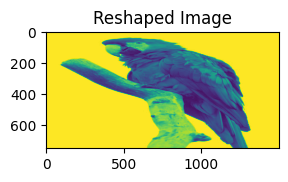

In [6]:
plt.figure(figsize=(3,3))
plt.title('Reshaped Image')
plt.imshow(bird_reshape)

Shape:  (500, 500, 3)


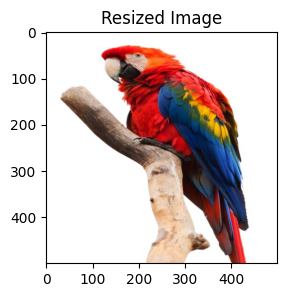

In [19]:
bird_resized = skimage.transform.resize(bird, (500, 500))

plt.figure(figsize=(3,3))
plt.title('Resized Image')
plt.imshow(bird_resized)

print("Shape: ", bird_resized.shape)

In [9]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


Shape:  (750, 500, 3)


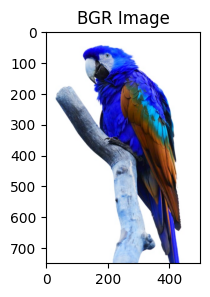

In [18]:
# Reversion color order from RGB to BGR
bird_BGR = bird[:, :, (2,1,0)]

plt.figure(figsize=(3,3))
plt.title('BGR Image')
plt.imshow(bird_BGR)

print('Shape: ', bird_BGR.shape)

Shape:  (750, 500)


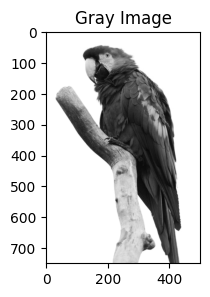

In [20]:
# Gray scale
bird_gray = skimage.color.rgb2gray(bird)

plt.figure(figsize=(3,3))
plt.title('Gray Image')
plt.imshow(bird_gray, cmap='gray')

print("Shape: ", bird_gray.shape)

Shape:  (378, 500, 3)


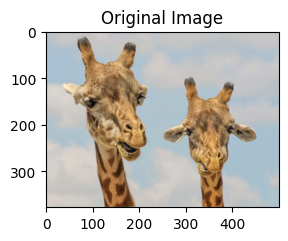

In [25]:
# Cropping
giraffes = skimage.img_as_float(skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure(figsize=(3,3))
plt.title('Original Image')
plt.imshow(giraffes)

print('Shape: ', giraffes.shape)

In [26]:
def crop(image, cropx, cropy):
    y, x, c = image.shape

    startx = x//2 - (cropx // 8)
    starty = y//3 - (cropy // 4)

    stopx = startx + cropx
    stopy = starty + 2*cropy

    return image[starty:stopy, startx:stopx]

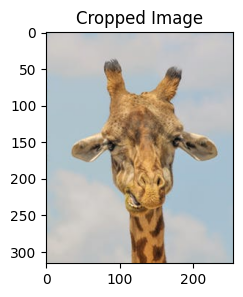

In [27]:
giraffes_cropped = crop(giraffes, 256, 256)

plt.figure(figsize=(3,3))
plt.title('Cropped Image')
plt.imshow(giraffes_cropped)

In [28]:
# Denoising images

from skimage.util import random_noise

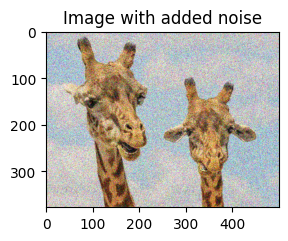

In [29]:
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var=sigma**2)

plt.figure(figsize=(3,3))
plt.title('Image with added noise')
plt.imshow(noisy_giraffes)

In [30]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [31]:
# Estimate the average noise standard deviation across color channels

In [32]:
sigma_est = estimate_sigma(noisy_giraffes,
                           multichannel=True,
                           average_sigmas=True)
sigma_est

/var/folders/b_/tg97_lwd1459t5crcdt5lc_h0000gn/T/ipykernel_2001/2811438580.py:1: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = estimate_sigma(noisy_giraffes,


0.14821952768167304

/var/folders/b_/tg97_lwd1459t5crcdt5lc_h0000gn/T/ipykernel_2001/2858906238.py:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.imshow(denoise_tv_chambolle(noisy_giraffes,


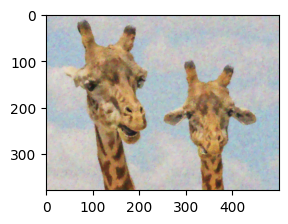

In [34]:
plt.figure(figsize=(3,3))
plt.imshow(denoise_tv_chambolle(noisy_giraffes,
                                weight=0.1,
                                multichannel=True))

/var/folders/b_/tg97_lwd1459t5crcdt5lc_h0000gn/T/ipykernel_2001/89997069.py:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.imshow(denoise_bilateral(noisy_giraffes,


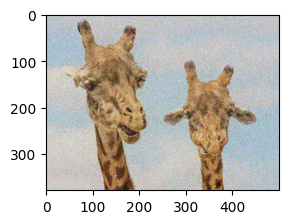

In [37]:
plt.figure(figsize=(3,3))
plt.imshow(denoise_bilateral(noisy_giraffes,
                             sigma_color=0.05,
                             sigma_spatial=15,
                             multichannel=True))

/var/folders/b_/tg97_lwd1459t5crcdt5lc_h0000gn/T/ipykernel_2001/755186900.py:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_wavelet`. It will be removed in version 1.0. Please use `channel_axis` instead.
  plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))


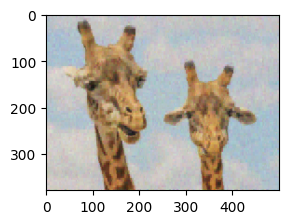

In [39]:
plt.figure(figsize=(3,3))
plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))

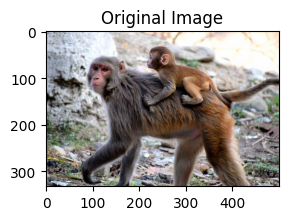

In [40]:
# Augmentation transformations
monkeys = skimage.img_as_float(skimage.io.imread('datasets/images/monkeys.jpeg')).astype(np.float32)

plt.figure(figsize=(3,3))
plt.title('Original Image')
plt.imshow(monkeys)

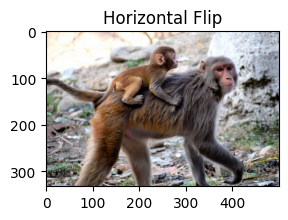

In [41]:
# Horizontal Flip
monkeys_flip = np.fliplr(monkeys)

plt.figure(figsize=(3,3))
plt.title('Horizontal Flip')
plt.imshow(monkeys_flip)

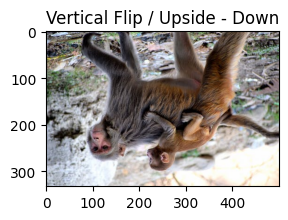

In [42]:
# Upside - Down
monkeys_ud = np.flipud(monkeys)

plt.figure(figsize=(3,3))
plt.title('Vertical Flip / Upside - Down')
plt.imshow(monkeys_ud)

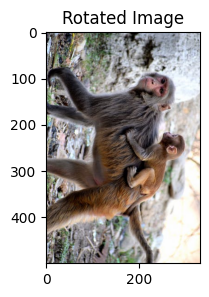

In [43]:
# Rotation
monkeys_rotate = np.rot90(monkeys, 3)
plt.figure(figsize=(3,3))
plt.title('Rotated Image')
plt.imshow(monkeys_rotate)

In [47]:
# Random rotation
import random
from scipy import ndarray

def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-25, 25)
    return skimage.transform.rotate(image_array, random_degree)

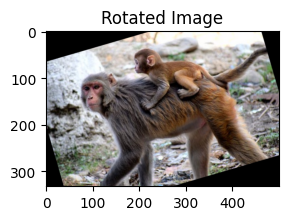

In [48]:
monkeys_angle = random_rotation(monkeys)
plt.figure(figsize=(3,3))
plt.title("Rotated Image")
plt.imshow(monkeys_angle)

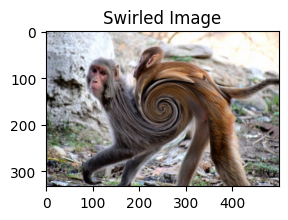

In [49]:
# Swirl
from skimage.transform import swirl
monkeys_swirl = swirl(monkeys, strength=10, radius=210)

plt.figure(figsize=(3,3))
plt.title('Swirled Image')
plt.imshow(monkeys_swirl)